# Importing packages and reading data

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split, validation_curve
import matplotlib.pyplot as plt
%matplotlib inline  
# allows you to do visualizations in the code

In [2]:
# reading the data
CustomerChurn= pd.read_csv('Bank Customer Churn Prediction.csv', index_col= 0)
CustomerChurn.head(3)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


# Understanding our data

In [3]:
CustomerChurn.groupby('churn')[['age', 'balance', 'estimated_salary']].describe()

age                                                     balance  \
        count       mean        std   min   25%   50%   75%   max   count   
churn                                                                       
0      7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0  7963.0   
1      2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0  2037.0   

                     ...                       estimated_salary  \
               mean  ...        75%        max            count   
churn                ...                                          
0      72745.296779  ...  126410.28  221532.80           7963.0   
1      91108.539337  ...  131433.33  250898.09           2037.0   

                                                                            \
                mean           std    min       25%        50%         75%   
churn                                                                        
0       99738.391772  57405.586966  90.07  50783.49   99645.04  148609.955   
1      101465.677531  57912.418071  11.58  51907.72  102460.84  152422.910   

                  
             max  
churn             
0      199992.48  
1      199808.10  

[2 rows x 24 columns]

In [4]:
CustomerChurn.groupby('churn')[['gender']].describe()

gender                     
       count unique     top  freq
churn                            
0       7963      2    Male  4559
1       2037      2  Female  1139

In [5]:
CustomerChurn.groupby('churn')[['age']].describe()

age                                                    
        count       mean        std   min   25%   50%   75%   max
churn                                                            
0      7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
1      2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0

In [6]:
CustomerChurn.groupby('churn')[['balance']].describe()

balance                                                        \
        count          mean           std  min       25%        50%   
churn                                                                 
0      7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
1      2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

                             
             75%        max  
churn                        
0      126410.28  221532.80  
1      131433.33  250898.09

In [7]:
CustomerChurn.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [8]:
CustomerChurn.products_number.value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

In [9]:
# Number of customers in each year 0 - 10
CustomerChurn['tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

In [10]:
# churn by tenure
CustomerChurn.groupby('churn')[['tenure']].describe()


tenure                                              
        count      mean       std  min  25%  50%  75%   max
churn                                                      
0      7963.0  5.033279  2.880658  0.0  3.0  5.0  7.0  10.0
1      2037.0  4.932744  2.936106  0.0  2.0  5.0  8.0  10.0

In [11]:
cc= CustomerChurn['gender'].value_counts(normalize= True)
print(cc)

Male      0.5457
Female    0.4543
Name: gender, dtype: float64


In [12]:
# comprehensive info on our data
CustomerChurn.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [13]:
CustomerChurn.country.value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [14]:
CustomerChurn.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Cleaning the data

In [15]:
CustomerChurn_bal=CustomerChurn.groupby('churn',group_keys=False).apply(lambda x: x.sample(2037,random_state=0))
CustomerChurn_bal.churn.value_counts()

0    2037
1    2037
Name: churn, dtype: int64

In [16]:
# create features and sets
x_CustomerChurn_bal, y_CustomerChurn_bal= CustomerChurn_bal.iloc[:, :-1], CustomerChurn_bal['churn']

# check my work
display(x_CustomerChurn_bal.head(3))
display(y_CustomerChurn_bal.head(3))

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
customer_id,,,,,,,,,,
15785975,525,Spain,Female,60,7,0.00,2,0,1,168034.90
15614520,682,France,Female,37,8,148580.12,1,1,0,35179.18
15812470,719,France,Male,61,5,0.00,2,0,1,29132.43


customer_id
15785975    0
15614520    0
15812470    0
Name: churn, dtype: int64

In [17]:
x_dummies=pd.get_dummies(x_CustomerChurn_bal)
x_dummies.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
customer_id,,,,,,,,,,,,,
15785975,525,60,7,0.00,2,0,1,168034.90,0,0,1,1,0
15614520,682,37,8,148580.12,1,1,0,35179.18,1,0,0,1,0
15812470,719,61,5,0.00,2,0,1,29132.43,1,0,0,0,1
15676156,528,32,4,85615.66,2,1,0,156192.43,1,0,0,1,0
15576256,582,39,5,0.00,2,1,1,129892.93,1,0,0,0,1


# Understanding features in new balanced data

In [18]:
x_dummies.describe()
# see what changes were made

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
count,4074.00000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000
mean,647.31296,41.080756,4.958517,81591.350854,1.503191,0.699558,0.460972,100855.176188,0.465636,0.302651,0.231713,0.491900,0.508100
std,97.87923,10.640366,2.918148,61168.069384,0.672576,0.458506,0.498536,57176.566787,0.498879,0.459462,0.421979,0.499996,0.499996
min,350.00000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,580.00000,33.000000,2.000000,0.000000,1.000000,0.000000,0.000000,52697.880000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,648.00000,40.000000,5.000000,102982.175000,1.000000,1.000000,0.000000,100825.740000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,715.00000,48.000000,7.000000,128824.100000,2.000000,1.000000,1.000000,149907.407500,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.00000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199909.320000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
x_dummies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4074 entries, 15785975 to 15717560
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      4074 non-null   int64  
 1   age               4074 non-null   int64  
 2   tenure            4074 non-null   int64  
 3   balance           4074 non-null   float64
 4   products_number   4074 non-null   int64  
 5   credit_card       4074 non-null   int64  
 6   active_member     4074 non-null   int64  
 7   estimated_salary  4074 non-null   float64
 8   country_France    4074 non-null   uint8  
 9   country_Germany   4074 non-null   uint8  
 10  country_Spain     4074 non-null   uint8  
 11  gender_Female     4074 non-null   uint8  
 12  gender_Male       4074 non-null   uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 306.3 KB


# Developing machine learning models

## KNeighborsClassifier

In [20]:
test_scores, train_scores= validation_curve(KNeighborsClassifier(n_neighbors= 5),
                                             x_dummies, y_CustomerChurn_bal,
                                            param_name= 'n_neighbors',
                                            param_range= [4, 5, 6, 9, 11, 13],
                                            cv= 4)

In [21]:
train_scores.mean(axis= 1).round(4)

array([0.5309, 0.5452, 0.5324, 0.5211, 0.5184, 0.5221])

In [22]:
test_scores.mean(axis= 1).round(4)
# .7072 is the highest, which means that 5 nearest neighbors is the best value

array([0.705 , 0.7072, 0.6753, 0.6486, 0.6364, 0.6252])

In [23]:
# split to train and test 
x_train, x_test, y_train, y_test= train_test_split(x_dummies, y_CustomerChurn_bal, random_state= 0)

In [24]:
# define the model
knn_cls_CustomerChurn1= KNeighborsClassifier(n_neighbors= 5)

In [25]:
# fit the data
knn_cls_CustomerChurn1.fit(x_train, y_train)


KNeighborsClassifier()

In [26]:
# evaluate the model
print('CustomerChurn1 acc on train: {:.2%}'.format (knn_cls_CustomerChurn1.score(x_train, y_train)))
print('CustomerChurn1 acc on test: {:.2%}'.format (knn_cls_CustomerChurn1.score(x_test, y_test)))



CustomerChurn1 acc on train: 71.06%
CustomerChurn1 acc on test: 54.07%


## Decision Tree

In [27]:
from sklearn.model_selection import train_test_split,  validation_curve
# make sure to import decision tree classifier
from sklearn.tree import DecisionTreeClassifier


In [28]:
train_scores,test_scores=validation_curve(DecisionTreeClassifier(random_state=0),
                                          x_train,y_train,param_name='max_leaf_nodes',
                                          param_range=[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,40,41,42,43,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,63,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100],
                                          cv=5)


In [29]:
train_scores.mean(axis=1).round(3)

array([  nan, 0.705, 0.729, 0.729, 0.729, 0.749, 0.751, 0.758, 0.76 ,
       0.761, 0.766, 0.771, 0.772, 0.775, 0.778, 0.779, 0.78 , 0.781,
       0.784, 0.786, 0.789, 0.792, 0.794, 0.797, 0.798, 0.8  , 0.801,
       0.803, 0.804, 0.816, 0.816, 0.818, 0.819, 0.82 , 0.822, 0.823,
       0.824, 0.825, 0.826, 0.826, 0.827, 0.829, 0.829, 0.83 , 0.831,
       0.832, 0.834, 0.835, 0.835, 0.836, 0.837, 0.838, 0.838, 0.839,
       0.84 , 0.842, 0.842, 0.843, 0.843, 0.844, 0.845, 0.845, 0.846,
       0.847, 0.848, 0.849, 0.849, 0.85 , 0.851, 0.852, 0.853, 0.854,
       0.854, 0.855, 0.856, 0.857, 0.858, 0.858, 0.859, 0.859, 0.86 ,
       0.861, 0.862, 0.862, 0.863, 0.864, 0.865, 0.865, 0.865])

In [30]:
tt=test_scores.mean(axis=1).round(3)
tt

array([  nan, 0.705, 0.729, 0.729, 0.729, 0.737, 0.737, 0.739, 0.744,
       0.742, 0.754, 0.758, 0.758, 0.764, 0.767, 0.767, 0.763, 0.765,
       0.766, 0.762, 0.763, 0.769, 0.769, 0.77 , 0.769, 0.766, 0.765,
       0.764, 0.765, 0.766, 0.764, 0.763, 0.764, 0.764, 0.766, 0.765,
       0.766, 0.764, 0.763, 0.764, 0.765, 0.764, 0.765, 0.767, 0.767,
       0.766, 0.765, 0.765, 0.765, 0.765, 0.764, 0.764, 0.764, 0.763,
       0.764, 0.763, 0.763, 0.763, 0.762, 0.763, 0.762, 0.759, 0.758,
       0.759, 0.757, 0.756, 0.757, 0.757, 0.757, 0.757, 0.755, 0.755,
       0.755, 0.755, 0.755, 0.753, 0.754, 0.754, 0.753, 0.755, 0.754,
       0.754, 0.753, 0.753, 0.752, 0.753, 0.752, 0.753, 0.752])

In [31]:
tt>.77

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [32]:
dt=DecisionTreeClassifier(random_state=0,max_leaf_nodes=24)

dt.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=24, random_state=0)

In [33]:
#elvaluate the performance
print('dt acc on train: {:.2%}'.format(dt.score(x_train,y_train)))
print('dt acc on test: {:.2%}'.format(dt.score(x_test,y_test)))


dt acc on train: 79.15%
dt acc on test: 75.37%


In [34]:
dt.feature_importances_.round(3)

array([0.   , 0.487, 0.   , 0.108, 0.286, 0.   , 0.092, 0.   , 0.   ,
       0.027, 0.   , 0.   , 0.   ])

In [35]:
x_dummies.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'country_France',
       'country_Germany', 'country_Spain', 'gender_Female', 'gender_Male'],
      dtype='object')

In [36]:
feat_imp=pd.DataFrame(data=dt.feature_importances_.round(3),
                     index=x_dummies.columns,# x_train?
                     columns=['importance'])
feat_imp.sort_values('importance',ascending=False)

,importance
age,0.487
products_number,0.286
balance,0.108
active_member,0.092
country_Germany,0.027
credit_score,0.000
tenure,0.000
credit_card,0.000
estimated_salary,0.000
country_France,0.000


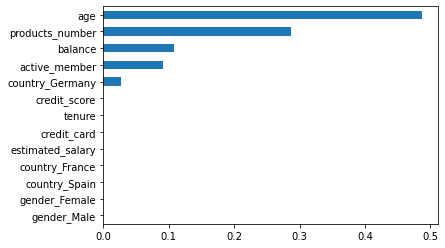

In [37]:
(pd.Series(dt.feature_importances_, index= x_dummies.columns)
.nlargest(13)
.plot(kind= 'barh')
.invert_yaxis())

In [38]:
# export graphic 
from sklearn.tree import export_graphviz


In [39]:
export_graphviz(dt,out_file='dt_vis.dot',
                feature_names=x_dummies.columns,
                class_names=dt.classes_.astype(str),
                filled=True)

## LogisticRegression

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [41]:
scaler1=MinMaxScaler()
x_dummies_trnsf=scaler1.fit_transform(x_dummies)
x_dummies_trnsf

array([[0.35      , 0.56756757, 0.7       , ..., 1.        , 1.        ,
        0.        ],
       [0.664     , 0.25675676, 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.738     , 0.58108108, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.484     , 0.27027027, 0.3       , ..., 1.        , 0.        ,
        1.        ],
       [0.836     , 0.32432432, 0.3       , ..., 1.        , 1.        ,
        0.        ],
       [0.46      , 0.43243243, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [42]:
# partition to train and test
x_train_trs, x_test_trs, y_train_trs, y_test_trs= train_test_split(x_dummies_trnsf, y_CustomerChurn_bal, random_state= 0)

In [43]:
C_range=[.1,.5,1,10,100,200]


In [44]:
train_scores, test_scores=validation_curve(LogisticRegression(max_iter=1000),
                                          x_train_trs,y_train_trs,
                                          param_name='C',param_range=C_range,
                                          cv=4)

In [45]:
train_scores.mean(axis=1).round(4)

array([0.7075, 0.7167, 0.7189, 0.7219, 0.7214, 0.7214])

In [46]:
test_scores.mean(axis=1).round(4)

array([0.7028, 0.7116, 0.7133, 0.7152, 0.7142, 0.7142])

In [47]:
log_reg=LogisticRegression(max_iter=1000,C=10)
log_reg.fit(x_train_trs,y_train_trs)

LogisticRegression(C=10, max_iter=1000)

In [48]:
print('acc train: {:.2%}'.format(log_reg.score(x_train_trs,y_train_trs)))
print('acc test: {:.2%}'.format(log_reg.score(x_test_trs,y_test_trs)))

acc train: 72.01%
acc test: 71.05%


In [49]:
x_dummies.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'country_France',
       'country_Germany', 'country_Spain', 'gender_Female', 'gender_Male'],
      dtype='object')

In [50]:
p1=[675,30,1,5000,2,0,1,32000,0,1,0,0,1]
log_reg.predict([p1])

array([1], dtype=int64)

In [51]:
log_reg.predict_proba([p1]).round(4)

array([[0., 1.]])

In [52]:
log_reg.classes_

array([0, 1], dtype=int64)

## SVM 

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import validation_curve
from sklearn.svm import LinearSVC

In [54]:
# define and fit (and transform) the scaler
scaler1= MinMaxScaler()
x_dummies_trns= scaler1.fit_transform(x_dummies)
x_dummies_trns.round(3)

array([[0.35 , 0.568, 0.7  , ..., 1.   , 1.   , 0.   ],
       [0.664, 0.257, 0.8  , ..., 0.   , 1.   , 0.   ],
       [0.738, 0.581, 0.5  , ..., 0.   , 0.   , 1.   ],
       ...,
       [0.484, 0.27 , 0.3  , ..., 1.   , 0.   , 1.   ],
       [0.836, 0.324, 0.3  , ..., 1.   , 1.   , 0.   ],
       [0.46 , 0.432, 0.   , ..., 0.   , 0.   , 1.   ]])

In [55]:
LinearSVC()

LinearSVC()

In [56]:
# using validation curve
train_scores, test_scores= validation_curve(LinearSVC(random_state= 0,max_iter=100000), 
                                           x_dummies_trnsf, y_CustomerChurn_bal,
                                           param_name= 'C',
                                           param_range= [.01,.05,.1,1,5,10,50], cv= 5)

In [57]:
train_scores.mean(axis=1).round(4)

array([0.7026, 0.7143, 0.7161, 0.7167, 0.7169, 0.717 , 0.717 ])

In [58]:
test_scores.mean(axis=1).round(4)
# .7148 is the highest which means .05 is the best

array([0.6988, 0.7131, 0.7135, 0.7123, 0.7116, 0.7116, 0.7116])

In [59]:
# evaluate the performance
print('average score in a four folds for different C values: ')
print('training: ', train_scores.mean(axis= 1).round(4))
print('test: ', test_scores.mean(axis= 1).round(4))

average score in a four folds for different C values: 
training:  [0.7026 0.7143 0.7161 0.7167 0.7169 0.717  0.717 ]
test:  [0.6988 0.7131 0.7135 0.7123 0.7116 0.7116 0.7116]


In [60]:
# define a LinearSVC(random_state= 0)
# fit with training data
BankChurn_svm= LinearSVC(random_state= 0)
BankChurn_svm.fit(x_train, y_train)

C:\Users\12029\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)

In [61]:
# evaluate the model
print('LinearSVC on train: {: .2%}'.format(BankChurn_svm.score(x_train, y_train)))
print('LinearSVC on test: {: .2%}'.format(BankChurn_svm.score(x_test, y_test)))

LinearSVC on train:  51.98%
LinearSVC on test:  51.03%


## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf1= RandomForestClassifier(n_estimators= 60, random_state= 0)
rf1.fit(x_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=0)

In [64]:
print('rf1 on train: {: .2%}'.format(rf1.score(x_train, y_train)))
print('rf1 on test: {: .2%}'.format(rf1.score(x_test, y_test)))

rf1 on train:  100.00%
rf1 on test:  77.53%


In [65]:
# feature importance in random forest
rf1.feature_importances_

array([0.12439766, 0.27263677, 0.07966621, 0.13584822, 0.11904129,
       0.01869823, 0.03915866, 0.13294677, 0.01315544, 0.02512585,
       0.01160438, 0.01433326, 0.01338725])

In [66]:
 rf1_feat_imp= pd.DataFrame(data= rf1.feature_importances_, 
                           index= x_dummies.columns, columns= ['importance'])
 rf1_feat_imp.sort_values(by= ['importance'], ascending= False)

,importance
age,0.272637
balance,0.135848
estimated_salary,0.132947
credit_score,0.124398
products_number,0.119041
tenure,0.079666
active_member,0.039159
country_Germany,0.025126
credit_card,0.018698
gender_Female,0.014333


### Feature importance in a graph

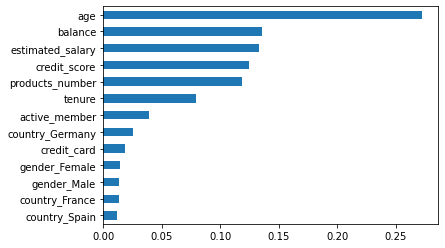

In [67]:
(pd.Series(rf1.feature_importances_, index= x_dummies.columns)
.nlargest(13)
.plot(kind= 'barh')
.invert_yaxis())

### Prediction for Random Forest

In [68]:
x_dummies.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'country_France',
       'country_Germany', 'country_Spain', 'gender_Female', 'gender_Male'],
      dtype='object')

In [69]:
# Making predictions
p1=[270, 40, 5, 2000, 4, 1, 1, 40000, 1, 0, 0, 1, 0]
p2=[720, 39, 2, 15000, 1, 1, 1, 62000, 0, 1, 0, 0, 1]
p3=[800, 37, 5, 11000, 1, 1, 1, 30000, 0, 1, 0, 1, 0]
p4=[30, 79, 2, 4345, 3, 1, 1, 50000, 0, 0, 1, 0, 1]
p5=[720, 39, 2, 15000, 3, 0, 1, 62000, 0, 1, 0, 0, 1]
rf1.predict([p1, p2, p3, p4, p5])

C:\Users\12029\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 0, 1, 1], dtype=int64)

In [70]:
# Making predictions
p1=[700, 60, 5, 1000, 2, 1, 1, 40000, 1, 0, 0, 1, 0]
p2=[600, 50, 6, 15000, 1, 1, 1, 80000, 1, 0, 0, 1, 0]
p3=[500, 50, 3, 20000, 1, 1, 1, 60000, 1, 0, 0, 1, 0]
p4=[400, 30, 4, 1000, 2, 1, 1, 10000, 1, 0, 0, 1, 0]
p5=[500, 60, 3, 20000, 4, 1, 1, 60000, 1, 0, 0, 1, 0]
rf1.predict([p1, p2, p3, p4, p5])


C:\Users\12029\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 1, 0, 1], dtype=int64)